# 프로젝트: 한영 번역기 만들기

## 라이브러리 버전을 확인해 봅니다

In [1]:
import pandas
import tensorflow
import matplotlib

print(pandas.__version__)
print(tensorflow.__version__)
print(matplotlib.__version__)

1.5.3
2.9.0
3.6.0


# Load Libraries

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
import matplotlib

# windows의 경우
#matplotlib.rcParams['font.family'] = 'Malgun Gothic'

# mac의 경우
matplotlib.rcParams['font.family'] = 'AppleGothic'
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#font = fm.FontProperties(fname=fontpath, size=9)
#plt.rc('font', family='NanumBarunGothic') 
#mpl.font_manager.findfont(font)

In [8]:
# 데이터 준비하기
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io

print(tf.__version__)

2.9.0


In [9]:
from tqdm import tqdm, trange

tqdm.pandas()

# Step 1. 데이터 다운로드
아래 링크에서 korean-english-park.train.tar.gz 를 다운로드받아 한영 병렬 데이터를 확보합니다.

- jungyeul/korean-parallel-corpora

In [10]:
# !pip install Korpora

In [11]:
from Korpora import Korpora
# Korpora.fetch("korean_parallel_koen_news")

In [12]:
corpus = Korpora.load("korean_parallel_koen_news")


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : KakaoBrain
    Repository : https://github.com/jungyeul/korean-parallel-corpora
    References :
        - Jungyeul Park, Jeen-Pyo Hong and Jeong-Won Cha (2016) Korean Language Resources for Everyone.
          In Proceedings of the 30th Pacific Asia Conference on Language, Information and Computation
          (PACLIC 30). October 28 - 30, 2016. Seoul, Korea. 
          (https://www.aclweb.org/anthology/Y16-2002/)

    # License
    Creative Commons Attribution Noncommercial No-Derivative-Works 3.0
    Details in https://creativecommons.org/licenses/by-nc-nd/3.0/



In [13]:
corpus.train[0].text

'개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"'

In [14]:
corpus.train[0].pair

'Much of personal computing is about "can you top this?"'

In [15]:
corpus.train.get_all_texts()[:10]

['개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"',
 '모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.',
 '그러나 이것은 또한 책상도 필요로 하지 않는다.',
 '79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분이든 그 움직임에따라 커서의 움직임을 조절하는 회전 운동 센서를 사용하고 있다.',
 '정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔음을 밝혔으며, 세계 해상 교역량의 거의 3분의 1을 운송하는 좁은 해로인 말라카 해협이 테러 공격을 당하기 쉽다고 경고하고 있다.',
 '이 지역에 있는 미국 선박과 상업용 선박들에 대한 알카에다의 (테러) 시도 중 여러 건이 실패했다는 것을 알게 된 후에, 전문가들은 테러 조직이 여전히 세계 경제에 타격을 입히려 한다고 경고하고 있으며, 동남 아시아에 있는 세계 경제의 주요 통로가 위험에 처해 있다고 그들은 생각하고 있다.',
 '국립 과학 학회가 발표한 새 보고서에따르면, 복잡한 임무를 수행해야 하는 군인들이나 보다 오랜 시간 동안 경계를 늦추지 않고 있기 위해 도움이 필요한 군인들에게 카페인이 반응 시간을 증가시키고 임무 수행 능력을 향상시키는데 도움이 된다고 한다.',
 '이 보고서에따르면, "특히, 군사 작전에서 생사가 걸린 상황이 될 수도 있는 반응 속도와 시각 및 청각의 경계 상태를 유지시키기 위해 카페인이 사용될 수도 있다." 고 한다.',
 '"결정적인 순간에 그들의 능력을 증가시켜 줄 그 무엇이 매우 중요합니다."',
 '연구가들이 이미 커피 대체품으로서 음식 대용 과자나 껌에 카페인을 첨가하는 방법을 연구하고 있다고 Archibald는 말했다.']

In [16]:
corpus.train.get_all_pairs()[:10]

['Much of personal computing is about "can you top this?"',
 'so a mention a few weeks ago about a rechargeable wireless optical mouse brought in another rechargeable, wireless mouse.',
 "Like all optical mice, But it also doesn't need a desk.",
 'uses gyroscopic sensors to control the cursor movement as you move your wrist, arm, whatever through the air.',
 "Intelligence officials have revealed a spate of foiled plots on ships in Southeast Asia and are warning that a narrow stretch of water carrying almost one third of the world's maritime trade is vulnerable to a terror attack.",
 "After learning of several foiled al Qaeda attempts on U.S. and commercial ships in the area, experts are warning that the terror network still wants to cripple the global economy, the world's economic jugular vein in Southeast Asia is at risk.",
 'Caffeine can help increase reaction time and improve performance for military servicemen who must perform complex tasks or who need help staying alert for longer

# Step 2. 데이터 정제
1. set 데이터형이 중복을 허용하지 않는다는 것을 활용해 중복된 데이터를 제거하도록 합니다. 데이터의 병렬 쌍이 흐트러지지 않게 주의하세요! 중복을 제거한 데이터를 cleaned_corpus 에 저장합니다.

In [17]:
ko = corpus.train.get_all_texts()
en = corpus.train.get_all_pairs()

In [18]:
df = pd.DataFrame({'ko':ko,'en':en})
df.head()

,ko,en
0,"개인용 컴퓨터 사용의 상당 부분은 ""이것보다 뛰어날 수 있느냐?""","Much of personal computing is about ""can you t..."
1,모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하...,so a mention a few weeks ago about a rechargea...
2,그러나 이것은 또한 책상도 필요로 하지 않는다.,"Like all optical mice, But it also doesn't nee..."
3,"79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분...",uses gyroscopic sensors to control the cursor ...
4,정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔...,Intelligence officials have revealed a spate o...


In [19]:
df.iloc[3].en

'uses gyroscopic sensors to control the cursor movement as you move your wrist, arm, whatever through the air.'

In [20]:
df = df.drop_duplicates()

In [21]:
cleaned_corpus = [df.ko.tolist(), df.en.tolist()]

### 전처리

2. 앞서 정의한 preprocessing() 함수는 한글에서는 동작하지 않습니다. 한글에 적용할 수 있는 정규식을 추가하여 함수를 재정의하세요!
> - 문장부호 앞 뒤로 공백 추가
> - 큰 따옴표 제거
> - 영어, 한글, ?,.! 제외한 문자 삭제

### + stopwords 추가 왜냐면 성능이 너무 안나오기 때문 ...

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/seongyeon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
def preprocess_sentence(sentence, s_token=False, e_token=False):
    sentence = sentence.lower().strip()
    
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence) # 문장부호 앞 뒤로 공백 추가
    sentence = re.sub(r'[" "]+', " ", sentence) # 큰 따옴표 제거
    sentence = re.sub(r"[^a-zA-Z가-힣?.!]+", " ", sentence)
    sentence = sentence.lstrip('.?! ')
    sentence = sentence.strip()
    sentence = ' '.join(sentence.split())
    
    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'
    
    return sentence


In [24]:
# 인코더의 입력이 될 한글 문장
cleaned_ko = [preprocess_sentence(x) for x in cleaned_corpus[0]] 

# target 문장
cleaned_en = [preprocess_sentence(x, s_token=True, e_token=True) for x in cleaned_corpus[1]]

In [25]:
cleaned_ko[:5]

['개인용 컴퓨터 사용의 상당 부분은 이것보다 뛰어날 수 있느냐 ?',
 '모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다 .',
 '그러나 이것은 또한 책상도 필요로 하지 않는다 .',
 '달러하는 이 최첨단 무선 광마우스는 허공에서 팔목 팔 그외에 어떤 부분이든 그 움직임에따라 커서의 움직임을 조절하는 회전 운동 센서를 사용하고 있다 .',
 '정보 관리들은 동남 아시아에서의 선박들에 대한 많은 테러 계획들이 실패로 돌아갔음을 밝혔으며 세계 해상 교역량의 거의 분의 을 운송하는 좁은 해로인 말라카 해협이 테러 공격을 당하기 쉽다고 경고하고 있다 .']

In [26]:
cleaned_en[:5]

['<start> much of personal computing is about can you top this ? <end>',
 '<start> so a mention a few weeks ago about a rechargeable wireless optical mouse brought in another rechargeable wireless mouse . <end>',
 '<start> like all optical mice but it also doesn t need a desk . <end>',
 '<start> uses gyroscopic sensors to control the cursor movement as you move your wrist arm whatever through the air . <end>',
 '<start> intelligence officials have revealed a spate of foiled plots on ships in southeast asia and are warning that a narrow stretch of water carrying almost one third of the world s maritime trade is vulnerable to a terror attack . <end>']

### 토큰화

3. 타겟 언어인 영문엔 <start> 토큰과 <end> 토큰을 추가하고 split() 함수를 이용하여 토큰화합니다. 한글 토큰화는 KoNLPy의 mecab 클래스를 사용합니다.

In [27]:
from konlpy.tag import Mecab

In [28]:
mecab = Mecab()

In [29]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [30]:
# nltk.download('punkt')

In [31]:
kor_corpus = [mecab.morphs(sentence) for sentence in tqdm(cleaned_ko)]

100%|██████████| 78968/78968 [00:13<00:00, 5669.17it/s]


In [32]:
eng_corpus = [sentence.split() for sentence in tqdm(cleaned_en)]

100%|██████████| 78968/78968 [00:01<00:00, 51639.60it/s] 


In [33]:
# stop_words = set(stopwords.words('english'))

In [34]:
eng_corpus[:5]

[['<start>',
  'much',
  'of',
  'personal',
  'computing',
  'is',
  'about',
  'can',
  'you',
  'top',
  'this',
  '?',
  '<end>'],
 ['<start>',
  'so',
  'a',
  'mention',
  'a',
  'few',
  'weeks',
  'ago',
  'about',
  'a',
  'rechargeable',
  'wireless',
  'optical',
  'mouse',
  'brought',
  'in',
  'another',
  'rechargeable',
  'wireless',
  'mouse',
  '.',
  '<end>'],
 ['<start>',
  'like',
  'all',
  'optical',
  'mice',
  'but',
  'it',
  'also',
  'doesn',
  't',
  'need',
  'a',
  'desk',
  '.',
  '<end>'],
 ['<start>',
  'uses',
  'gyroscopic',
  'sensors',
  'to',
  'control',
  'the',
  'cursor',
  'movement',
  'as',
  'you',
  'move',
  'your',
  'wrist',
  'arm',
  'whatever',
  'through',
  'the',
  'air',
  '.',
  '<end>'],
 ['<start>',
  'intelligence',
  'officials',
  'have',
  'revealed',
  'a',
  'spate',
  'of',
  'foiled',
  'plots',
  'on',
  'ships',
  'in',
  'southeast',
  'asia',
  'and',
  'are',
  'warning',
  'that',
  'a',
  'narrow',
  'stretch',

In [35]:
# eng_corpus = [[words for words in sents if words != 'the'] for sents in eng_corpus]

## 토큰의 길이 확인

모든 데이터를 사용할 경우 학습에 굉장히 오랜 시간이 걸립니다. cleaned_corpus로부터 토큰의 길이가 40 이하인 데이터를 선별하여 eng_corpus와 kor_corpus를 각각 구축하세요.



In [36]:
def check_token_len(corpus):
    print('토큰의 최소 길이 :',min(len(l) for l in corpus))
    print('토큰의 최대 길이 :',max(len(l) for l in corpus))
    print('토큰의 평균 길이 :',sum(map(len, corpus))/len(corpus))
    plt.hist([len(s) for s in corpus], bins=50)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.show();

토큰의 최소 길이 : 0
토큰의 최대 길이 : 121
토큰의 평균 길이 : 28.42886992199372


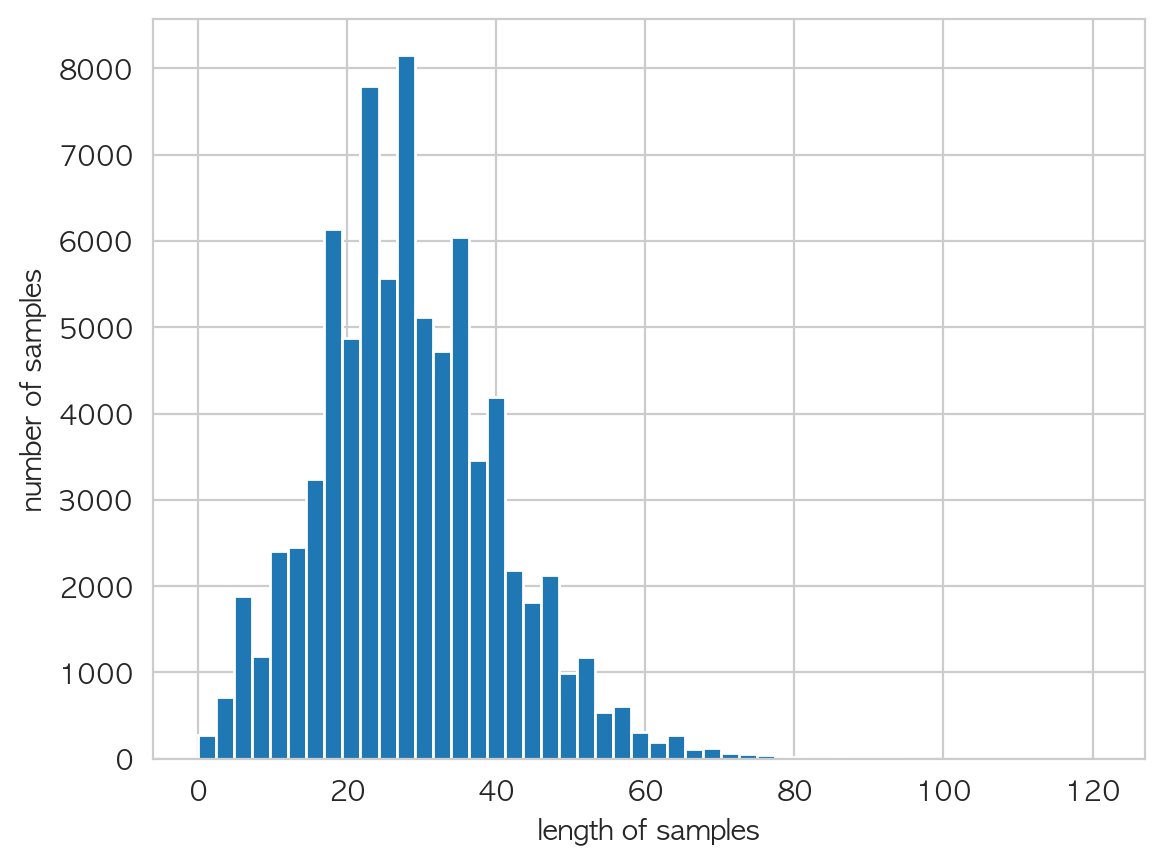

In [37]:
check_token_len(kor_corpus)

토큰의 최소 길이 : 2
토큰의 최대 길이 : 98
토큰의 평균 길이 : 25.61612298652619


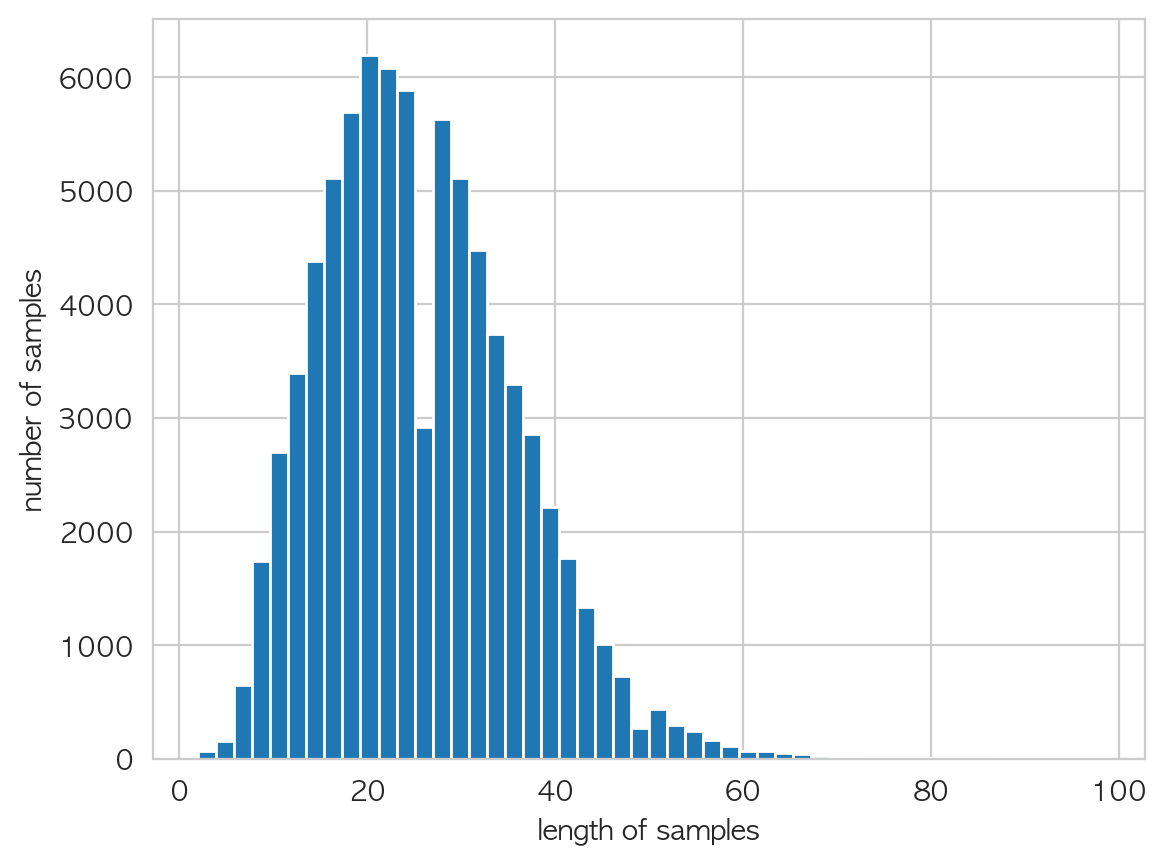

In [38]:
check_token_len(eng_corpus)

In [39]:
# 전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇 %인지 확인

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [40]:
max_len = 40
below_threshold_len(max_len, kor_corpus)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 84.87108702259142


In [41]:
below_threshold_len(max_len, eng_corpus)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 91.58266639651504


In [42]:
[l for l in kor_corpus if len(l) < 7][:10]

[['어휘'],
 ['어휘'],
 ['선례', '가', '하나', '있', '다', '.'],
 ['그것', '은', '큰', '문제', '입니다', '.'],
 ['어휘'],
 ['난', '롱', '죤', '액티브', '라구', '.'],
 ['낙태', '는', '불법', '이', '다', '.'],
 ['하', '는', '질문', '이', '아닙니다', '.'],
 ['모르', '고', '있', '습니다', '.'],
 ['네', '보이', '는군요', '.']]

In [43]:
[l for l in eng_corpus if len(l) < 4][:10]

[['<start>', 'sommelier', '<end>'],
 ['<start>', 'typos', '<end>'],
 ['<start>', 'men', '<end>'],
 ['<start>', 'family', '<end>'],
 ['<start>', 'lifeguards', '<end>'],
 ['<start>', 'food', '<end>'],
 ['<start>', 'sunlight', '<end>'],
 ['<start>', '<end>'],
 ['<start>', 'fruits', '<end>'],
 ['<start>', 'onions', '<end>']]

In [44]:
def drop_empty_list(kor_corpus, eng_corpus):
    # 각 샘플들의 길이를 확인해서
    # kor_corpus에서 길이가 7미만, 40초과 제거
    # eng_corpus에서 길이가 4미만, 40초과 제거
    # 길이 7이하, 4이하는 데이터를 확인하여 이상한 데이터였기에 제거하고자 함
    
    drop_kor = [index for index, sentence in enumerate(kor_corpus) 
                if (len(sentence) < 7) or (len(sentence) > 40)]
    print(f'제거하고자 하는 한글 샘플 수 : {len(drop_kor)}')
    
    drop_eng = [index for index, sentence in enumerate(eng_corpus)
                if (len(sentence) < 4) or (len(sentence) > 40)]
    print(f'제거하고자 하는 영어 샘플 수 : {len(drop_eng)}')
    
    drop_data = set(drop_kor) | set(drop_eng)
    drop_data = list(drop_data)
    print(f'제거하고자 하는 총 샘플 수 : {len(drop_data)}')

    # 빈 샘플 제거
    kor_corpus = np.delete(kor_corpus, drop_data, axis=0)
    eng_corpus = np.delete(eng_corpus, drop_data, axis=0)
    print(f'빈 샘플 제거 후 남은 kor_corpus data : {len(kor_corpus)}')
    print(f'빈 샘플 제거 후 남은 eng_corpus data : {len(eng_corpus)}')
    return kor_corpus, eng_corpus

In [45]:
kor_corpus, eng_corpus = drop_empty_list(kor_corpus, eng_corpus)

제거하고자 하는 한글 샘플 수 : 14165
제거하고자 하는 영어 샘플 수 : 6713
제거하고자 하는 총 샘플 수 : 16878
빈 샘플 제거 후 남은 kor_corpus data : 62090
빈 샘플 제거 후 남은 eng_corpus data : 62090


/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


토큰의 최소 길이 : 4
토큰의 최대 길이 : 40
토큰의 평균 길이 : 22.949557094540182


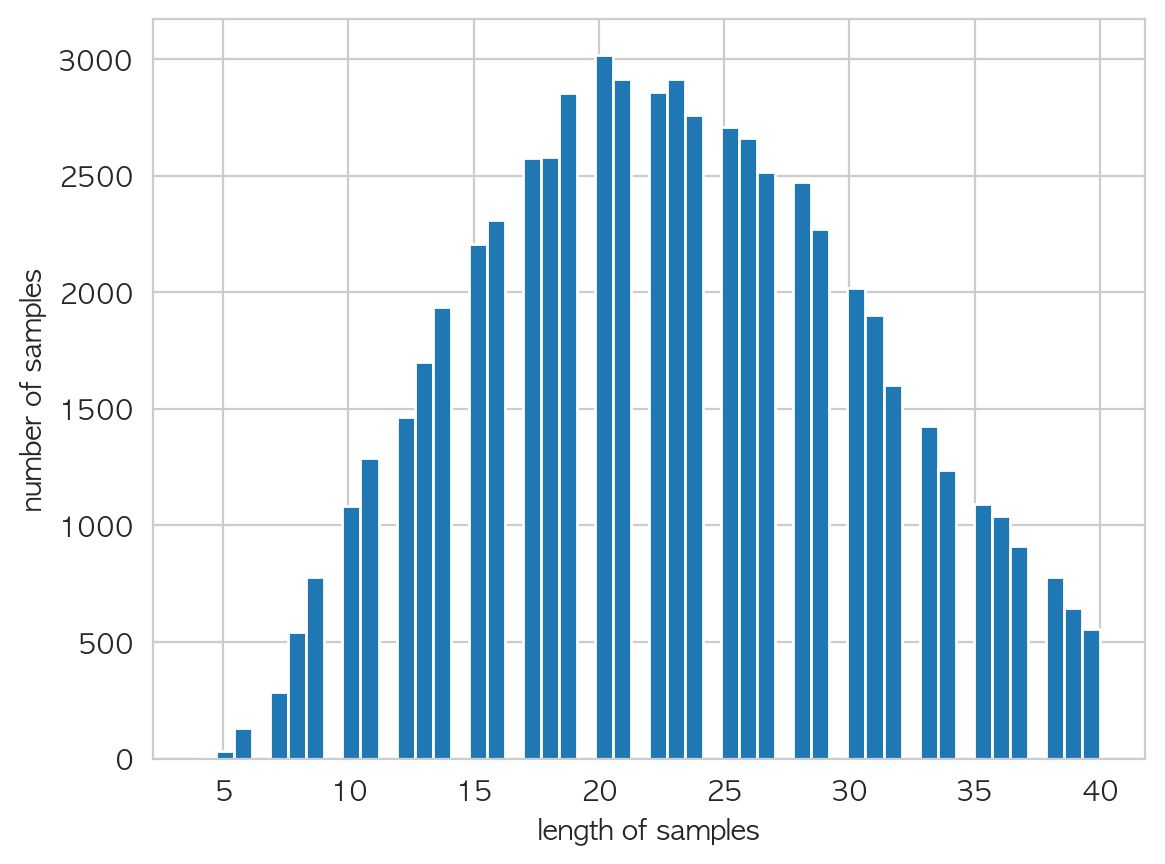

토큰의 최소 길이 : 7
토큰의 최대 길이 : 40
토큰의 평균 길이 : 25.248333064905783


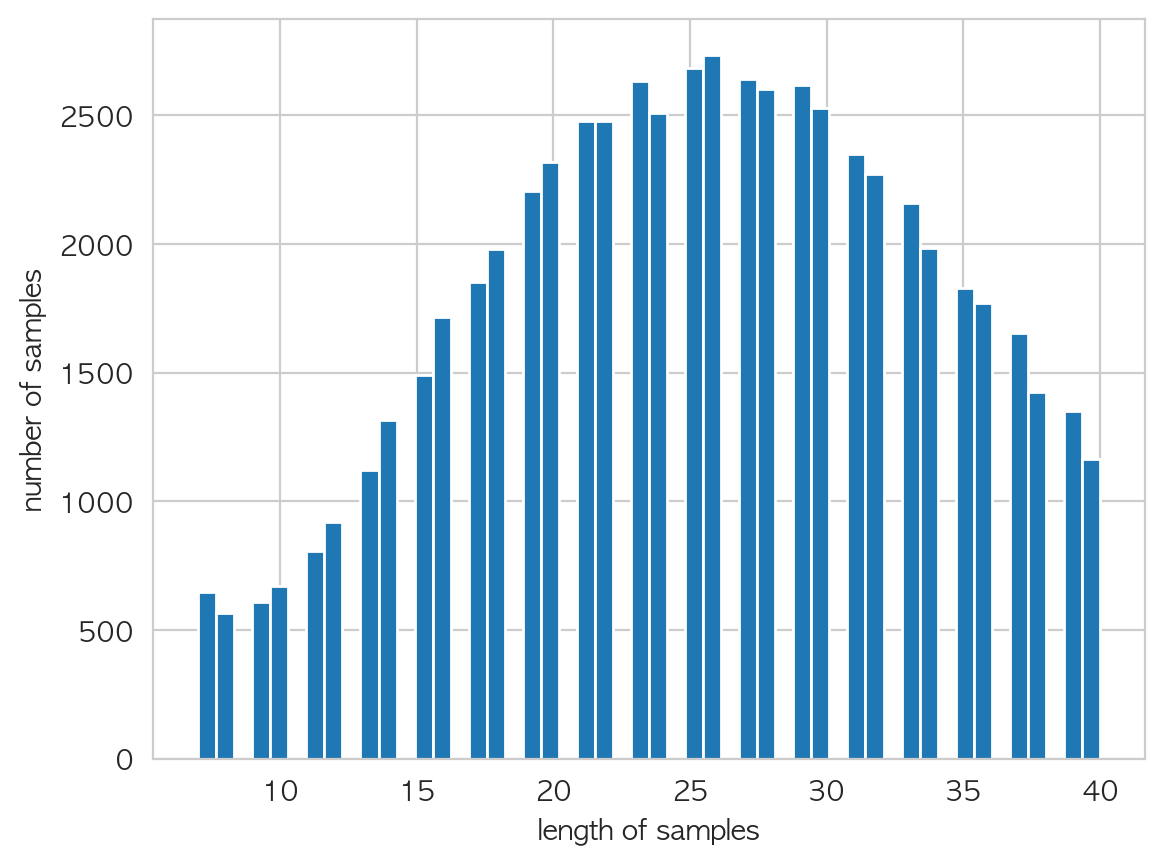

In [46]:
check_token_len(eng_corpus)
check_token_len(kor_corpus)

# Step 3. 데이터 토큰화
앞서 정의한 tokenize() 함수를 사용해 데이터를 텐서로 변환하고 각각의 tokenizer를 얻으세요! 단어의 수는 실험을 통해 적당한 값을 맞춰주도록 합니다! (최소 10,000 이상!)

❗ 주의: 난이도에 비해 데이터가 많지 않아 훈련 데이터와 검증 데이터를 따로 나누지는 않습니다.

In [47]:
def tokenize(corpus, num_words, reverse=False):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', num_words=num_words)
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
    
    if reverse:
        tensor = np.flip(tensor, axis=1)
    
    return tensor, tokenizer

In [48]:
num_words = None

In [49]:
enc, enc_tokenizer = tokenize(kor_corpus, num_words, reverse=True)
dec, dec_tokenizer = tokenize(eng_corpus, num_words)

In [50]:
len(enc_tokenizer.word_index)

44154

In [51]:
len(dec_tokenizer.word_index)

38945

In [52]:
enc.shape, dec.shape

((62090, 40), (62090, 40))

In [53]:
enc

array([[   0,    0,    0, ...,  538,  553,  692],
       [   0,    0,    0, ..., 5789, 5410,  213],
       [   0,    0,    0, ...,    7,  708,   78],
       ...,
       [   0,    0,    0, ..., 1683,  362,   78],
       [   0,    0,    0, ...,   23,  675,  907],
       [   0,    0,    0, ...,  907,    7,   68]], dtype=int32)

In [55]:
dec

array([[  3, 274,   6, ...,   0,   0,   0],
       [  3, 142,   7, ...,   0,   0,   0],
       [  3, 161,  76, ...,   0,   0,   0],
       ...,
       [  3,  31,   1, ...,   0,   0,   0],
       [  3, 288,   9, ...,   0,   0,   0],
       [  3,  61,  30, ...,   0,   0,   0]], dtype=int32)

# Step 4. 모델 설계
한국어를 영어로 잘 번역해 줄 멋진 Attention 기반 Seq2seq 모델을 설계하세요! 앞서 만든 모델에 Dropout 모듈을 추가하면 성능이 더 좋아집니다! Embedding Size와 Hidden Size는 실험을 통해 적당한 값을 맞춰 주도록 합니다!

In [56]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn

class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, 
                 dropout=0.0, recurrent_dropout=0.0):
        
        super(Encoder, self).__init__()
        
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.enc_units, 
                                       dropout=dropout,
                                       recurrent_dropout=recurrent_dropout,
                                       return_sequences=True,
                                       return_state=True,
                                      recurrent_initializer='glorot_uniform')
        
        self.dropout = tf.keras.layers.Dropout(dropout)

    def call(self, x):

        x = self.embedding(x)
        # embedding layer 통과한 후에 dropout 추가
        x = self.dropout(x)

        output, state = self.gru(x)

        return output, state
    
    
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, 
                 dropout=0.0, recurrent_dropout=0.0):
        
        super(Decoder, self).__init__()
        
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.dropout = tf.keras.layers.Dropout(dropout)
        self.gru = tf.keras.layers.GRU(self.dec_units,
                                       dropout=dropout,
                                       recurrent_dropout=recurrent_dropout,
                                       return_sequences=True, 
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        
        self.fc = tf.keras.layers.Dense(vocab_size)
        
        self.attention = BahdanauAttention(self.dec_units)   # Attention 필수 사용!

    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)
        
        x = self.embedding(x)
        # embedding layer 통과한 후에 dropout 추가
        x = self.dropout(x)
        
        x = tf.concat([tf.expand_dims(context_vec, 1), x], axis=-1)
        
        x, h_dec = self.gru(x)
        x = tf.reshape(x, (-1, x.shape[2]))
        output = self.fc(x)
        
        return output, h_dec, attn

In [57]:
BATCH_SIZE     = 32
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

ENC_DROPOUT = 0.3
DEC_DROPOUT = 0.5
ENC_RECURRENT_DROPOUT = 0.0
DEC_RECURRENT_DROPOUT = 0.0

units         = 600
embedding_dim = 1000

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units, ENC_DROPOUT, ENC_RECURRENT_DROPOUT)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units, DEC_DROPOUT, DEC_RECURRENT_DROPOUT)

# Step 5. 훈련하기
훈련엔 위에서 사용한 코드를 그대로 사용하되, eval_step() 부분이 없음에 유의합니다! 매 스텝 아래의 예문에 대한 번역을 생성하여 본인이 생각하기에 가장 멋지게 번역한 Case를 제출하세요! (Attention Map을 시각화해보는 것도 재밌을 거예요!)

    ## 예문 ##
    K1) 오바마는 대통령이다.
    K2) 시민들은 도시 속에 산다.
    K3) 커피는 필요 없다.
    K4) 일곱 명의 사망자가 발생했다.

    ## 제출 ##
    E1) obama is the president . <end>
    E2) people are victims of the city . <end>
    E2) the price is not enough . <end>
    E2) seven people have died . <end>

### Optimizer & Loss

In [58]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    
    return tf.reduce_mean(loss)

### train_step

In [59]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        
        # 1) Encoder에 소스 문장을 전달해 컨텍스트 벡터인 enc_out 을 생성
        enc_out, state = encoder(src)
        
        # 2) t=0일 때, Decoder의 Hidden State는 Encoder의 Final State로 정의
        h_dec = state
        
        # 3) Decoder에 입력으로 전달할 <start> 토큰 문장 생성
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

        for t in range(1, tgt.shape[1]):
            # 4) <start> 문장과 enc_out, Hidden State를 기반으로 다음 단어(t=1)를 예측. 
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)
            
            # 5) 예측된 단어와 정답 간의 Loss를 구한 후, t=1의 정답 단어를 다음 입력으로 사용
            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss

In [60]:
# !nvidia-smi

In [ ]:
from tqdm import tqdm    # tqdm
import random

EPOCHS = 50

batch_losses = []
for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)    #tqdm

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc[idx:idx+BATCH_SIZE],
                                dec[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
        
        batch_losses.append(batch_loss)
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))    # tqdm
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))    # tqdm

  0%|          | 0/1941 [00:00<?, ?it/s]2024-07-09 10:29:04.903663: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [ ]:
dec_tokenizer.index_word[3]

In [ ]:
def evaluate(sentence, encoder, decoder):
    attention = np.zeros((dec.shape[-1], enc.shape[-1]))
    
    sentence = preprocess_sentence(sentence)
    inputs = enc_tokenizer.texts_to_sequences([mecab.morphs(sentence)])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=enc.shape[-1],
                                                           padding='post')
    inputs = np.flip(inputs, axis=1)

    result = ''

    enc_out, state = encoder(inputs)

    dec_hidden = state
    dec_input = tf.expand_dims([dec_tokenizer.word_index['<start>']], 0)

    for t in range(dec.shape[-1]):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()

        #predicted_id = tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()
        predicted_id = tf.argmax(predictions[0]).numpy()

        result += dec_tokenizer.index_word[predicted_id] + ' '

        if dec_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence, attention

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention


def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def translate(sentence, encoder, decoder):
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))
    
    attention = attention[:len(result.split()), :len(mecab.morphs(sentence))]
    plot_attention(attention, mecab.morphs(sentence), result.split(' '))
    
translate("일곱 명의 사망자가 발생했다.", encoder, decoder)

In [ ]:
K1) 오바마는 대통령이다.
K2) 시민들은 도시 속에 산다.
K3) 커피는 필요 없다.
K4) 일곱 명의 사망자가 발생했다.

In [ ]:
translate("오바마는 대통령이다.", encoder, decoder)